# 2019 and 2020 Comparison of Carbon Monoxide and Nitrogen Dioxide Emissions in the Los Angeles and New York Metropolitan Areas

#### Summary: CO and NO2 emissions are directly tied to vehicles and transportation, and as a result should be changing due to COVID restrictions.


#### Question: How and when have Los Angeles and New York City's CO and NO2 emissions lowered this year compared to last year?


#### Hypothesis: Cities with more public transportation will not experience as much CO and NO2 emissions changes due to the existing public transportation that was already reducing transportation related emissions pre-COVID. New York City has much more public transportation, and as a result should experience less change in CO and NO2 emissions comparted to Los Angeles in 2020.


#### Goal: Evaluate CO and NO2 emissions data from Los Angeles and New York City metropolitan areas over the past two years (2019-2020) and confirm whether COVID restrictions have decreased the amount of CO and NO2 in the respective cities and by how much.

In [1]:
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import requests
from io import StringIO

# Initialize lists with URLs that link to the data being analyzed
# The data was obtained from the following source: https://openaq.org/
# The data analyzed was recorded at various sensor sites

LosAngeles2019URLList = ["https://drive.google.com/file/d/1OPUAesMOgTo47Ys7dP3tMal9v-1SBFq8/view?usp=sharing", 
                         "https://drive.google.com/file/d/1agsM07wpk3Db6fnLvCHwFhEHxUCOMDEk/view?usp=sharing",
                         "https://drive.google.com/file/d/1oyGh-U58HrhIssSwJcPYDZ_MUvSbPtVA/view?usp=sharing",
                         "https://drive.google.com/file/d/1FJ7aT6vVPxPbKnyAuxpzQ9BcL1BprlZd/view?usp=sharing"]

LosAngeles2020URLList = ["https://drive.google.com/file/d/1vIdIu_undhwV_7GQyXyprxKUhuF2FKv_/view?usp=sharing",
                         "https://drive.google.com/file/d/1ko1vYvYsayoHG6af-Ag3TStK3NVUJzUe/view?usp=sharing",
                         "https://drive.google.com/file/d/1eSri_7TTrbR_ZpJvk3IwjibT1xU68XsU/view?usp=sharing",
                         "https://drive.google.com/file/d/145bm-i4Aw9NOcA4qISMQmp37RxTdQy8I/view?usp=sharing"]

NewYork2019URLList = ["https://drive.google.com/file/d/1lvhVW7GuDyRfA_1gpX23A9WvndiLKv1M/view?usp=sharing",
                      "https://drive.google.com/file/d/1KbaLfyynwzmO8K4IzyzSD8wM3lvoGsIW/view?usp=sharing",
                      "https://drive.google.com/file/d/1Ort2fGK-EGGMoQKTY_Tv8mnR68-8tqHO/view?usp=sharing",
                      "https://drive.google.com/file/d/1vCAoVTCEj_7j5Ap5qJ8MJXWxbfh77vq6/view?usp=sharing"]

NewYork2020URLList = ["https://drive.google.com/file/d/1lBan4iJxilakd8jdgYRSiqwCRgB5Ggf0/view?usp=sharing",
                      "https://drive.google.com/file/d/1eHr_fJ8seoQp2EBZincepcPkXUTjReTr/view?usp=sharing",
                      "https://drive.google.com/file/d/1DYKCdYhlymidgYssnTbP_ZRN0oK7kZ11/view?usp=sharing",
                      "https://drive.google.com/file/d/10rxPMQAV0NfMilSoPsobR3Z-9UT8_Kbp/view?usp=sharing"]

# Create function that computes average CO and NO2 for the months of January - April

def fileAnalysis(filelist, pollutant):    
    januaryAverage = []
    februaryAverage = []
    marchAverage = []
    aprilAverage = []

    for fileinstance in filelist:

        orig_url = fileinstance

        #this is to remove all the directory information and only extract the alpha numerical file identifier of the code

        file_id = orig_url.split('/')[-2]

        #this is to add the "export syntax to the alpha numierical file_id

        dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

        #turn this object into a raw string

        url = requests.get(dwn_url).text

        csv_raw = StringIO(url)

        #use csv to load the data

        dfnational = csv.reader(csv_raw, delimiter = ',')
        next(dfnational)
        for row in dfnational:
            if float(row[6]) > 0 and row[5] == pollutant:
                date = datetime.strptime(row[3], "%Y-%m-%dT%H:%M:%SZ")
                if date.month == 1:
                    januaryAverage.append(float(row[6]))
                if date.month == 2:
                    februaryAverage.append(float(row[6]))
                if date.month == 3:
                    marchAverage.append(float(row[6]))
                if date.month == 4:
                    aprilAverage.append(float(row[6]))

              
    januaryAverage = sum(januaryAverage)/len(januaryAverage)
    februaryAverage = sum(februaryAverage)/len(februaryAverage)
    marchAverage = sum(marchAverage)/len(marchAverage)
    aprilAverage = sum(aprilAverage)/len(aprilAverage)

    averageList = [januaryAverage, februaryAverage, marchAverage, aprilAverage]
        
    return averageList


# Create function that aggregates all pollutant data for each month

def totalFileData(filelist, pollutant, mon):
    pollutantData = []
    time = []
    for fileinstance in filelist:
        orig_url = fileinstance

        #this is to remove all the directory information and only extract the alpha numerical file identifier of the code

        file_id = orig_url.split('/')[-2]

        #this is to add the "export syntax to the alpha numierical file_id

        dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

        #turn this object into a raw string

        url = requests.get(dwn_url).text

        csv_raw = StringIO(url)

        #use csv to load the data

        dfnational = csv.reader(csv_raw, delimiter = ',')
        next(dfnational)
        for row in dfnational:
                if float(row[6]) > 0 and row[5] == pollutant:
                    date = datetime.strptime(row[3], "%Y-%m-%dT%H:%M:%SZ")
                    if date.month == mon:
                        pollutantData.append(float(row[6]))                    
    return pollutantData


In [2]:
# Initialize list containing CO average values for 2019
LosAngelesAverageCO2019 = fileAnalysis(LosAngeles2019URLList, 'co')

In [3]:
# Initialize list containing CO average values for 2020
LosAngelesAverageCO2020 = fileAnalysis(LosAngeles2020URLList, 'co')

In [4]:
# Initialize list containing NO2 average values for 2019
LosAngelesAverageNO22019 = fileAnalysis(LosAngeles2019URLList, 'no2')

In [5]:
# Initialize list containing NO2 average values for 2020
LosAngelesAverageNO22020 = fileAnalysis(LosAngeles2020URLList, 'no2')

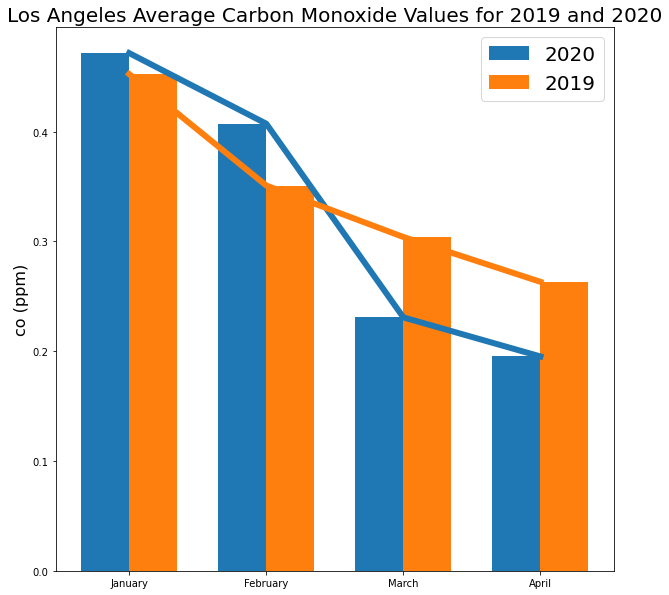

In [6]:
# Used the following source to display bar chart with average CO bars side by side
# Source: https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py    


# Create bar chart with average CO values side by side with trend line also displayed

monthList = ['January','February','March','April']
x = np.arange(len(monthList))  # the label locations
width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
bar1 = ax.bar(x - width/2, LosAngelesAverageCO2020, width, label='2020')
bar2 = ax.bar(x + width/2, LosAngelesAverageCO2019, width, label='2019')
bar3 = ax.plot(monthList, LosAngelesAverageCO2020, linewidth=6)
bar4 = ax.plot(monthList, LosAngelesAverageCO2019, linewidth=6)

ax.set_ylabel('co (ppm)', fontsize = 16)
ax.set_title('Los Angeles Average Carbon Monoxide Values for 2019 and 2020', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(monthList)
ax.legend(prop={'size': 20})

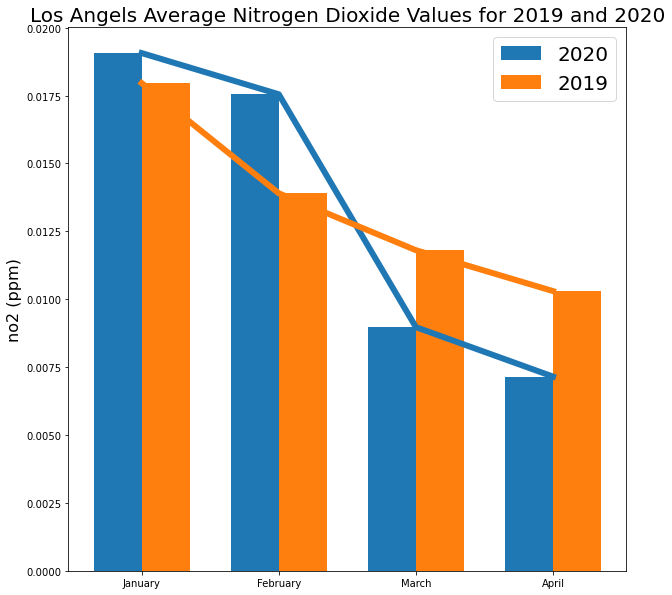

In [8]:
# Create bar chart with average NO2 values side by side with trend line also displayed
monthList = ['January','February','March','April']
x = np.arange(len(monthList)) 
width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, LosAngelesAverageNO22020, width, label='2020')
rects2 = ax.bar(x + width/2, LosAngelesAverageNO22019, width, label='2019')
rects3 = ax.plot(monthList, LosAngelesAverageNO22020, linewidth=6)
rects4 = ax.plot(monthList, LosAngelesAverageNO22019, linewidth=6)
ax.set_ylabel('no2 (ppm)', fontsize = 16)
ax.set_title('Los Angels Average Nitrogen Dioxide Values for 2019 and 2020', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(monthList)
ax.legend(prop={'size': 20})

In [9]:
# Initialize list for distribution of all co values for March, 2019
LAMarTotalCO2019 = totalFileData(LosAngeles2019URLList, 'co', 3)

In [10]:
# Initialize list for distribution of all co values for March, 2020
LAMarTotalCO2020 = totalFileData(LosAngeles2020URLList, 'co', 3)

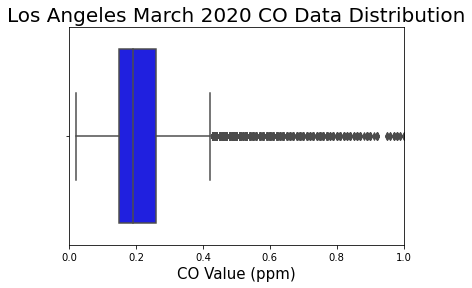

(0.0, 1.0)

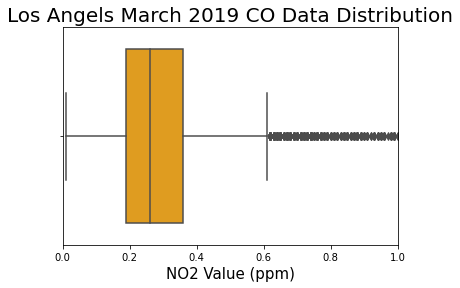

In [11]:
# Display Box Plot with distribution of data for the month of March (Top: 2020; Bottom: 2019)
# Box Plot indicates that CO values trend toward lower values in March 2020 compared to
# March 2019

sns.boxplot(LAMarTotalCO2020, color='b')
plt.title("Los Angeles March 2020 CO Data Distribution", fontsize=20)
plt.xlabel("CO Value (ppm)", fontsize=15)
plt.xlim(0,1)
plt.show()
sns.boxplot(LAMarTotalCO2019, color='orange')
plt.title("Los Angels March 2019 CO Data Distribution", fontsize=20)
plt.xlabel("NO2 Value (ppm)", fontsize=15)
plt.xlim(0,1)

In [12]:
# Initialize list containing CO average values for 2019
NewYorkAverageCO2019 = fileAnalysis(NewYork2019URLList, 'co')

In [13]:
# Initialize list containing CO average values for 2020
NewYorkAverageCO2020 = fileAnalysis(NewYork2020URLList, 'co')

In [14]:
# Initialize list containing NO2 average values for 2019
NewYorkAverageNO22019 = fileAnalysis(NewYork2019URLList, 'no2')

In [15]:
# Initialize list containing NO2 average values for 2020
NewYorkAverageNO22020 = fileAnalysis(NewYork2020URLList, 'no2')

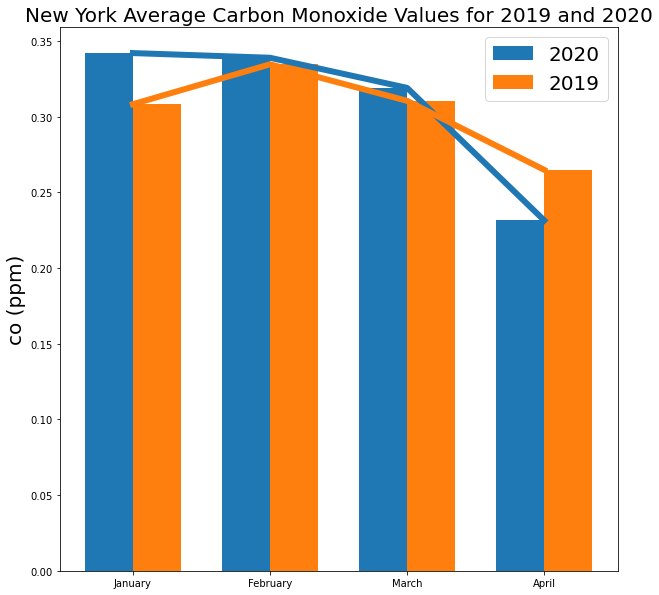

In [16]:
# Create bar chart with average CO values side by side with trend line also displayed

monthList = ['January','February','March','April']
x = np.arange(len(monthList)) 
width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, NewYorkAverageCO2020, width, label='2020')
rects2 = ax.bar(x + width/2, NewYorkAverageCO2019, width, label='2019')
rects3 = ax.plot(monthList, NewYorkAverageCO2020, linewidth=6)
rects4 = ax.plot(monthList, NewYorkAverageCO2019, linewidth=6)
ax.set_ylabel('co (ppm)', fontsize = 20)
ax.set_title('New York Average Carbon Monoxide Values for 2019 and 2020', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(monthList)
ax.legend(prop={'size': 20})

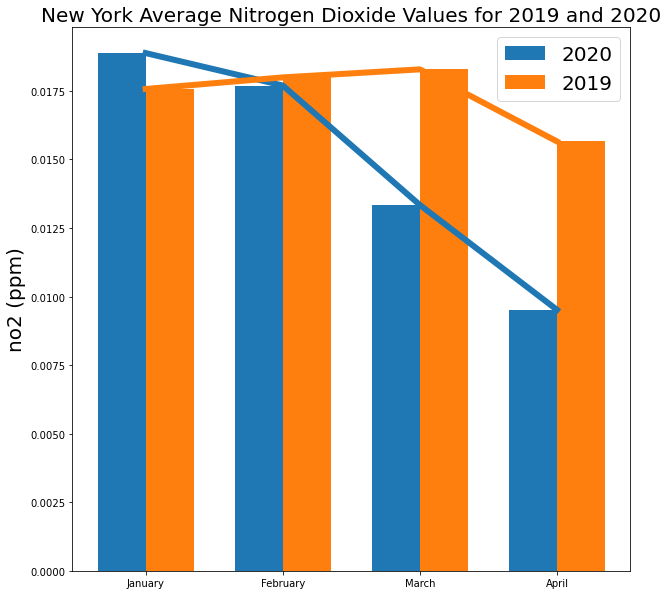

In [17]:
# Create bar chart with average NO2 values side by side with trend line also displayed

monthList = ['January','February','March','April']
x = np.arange(len(monthList))  # the label locations
width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, NewYorkAverageNO22020, width, label='2020')
rects2 = ax.bar(x + width/2, NewYorkAverageNO22019, width, label='2019')
rects3 = ax.plot(monthList, NewYorkAverageNO22020, linewidth=6)
rects4 = ax.plot(monthList, NewYorkAverageNO22019, linewidth=6)
ax.set_ylabel('no2 (ppm)', fontsize=20)
ax.set_title('New York Average Nitrogen Dioxide Values for 2019 and 2020', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(monthList)
ax.legend(prop={'size': 20})

In [21]:
# Initialize list for distribution of all co values for March, 2019
NYMarTotalCO2019 = totalFileData(NewYork2019URLList, 'co', 3)

In [22]:
# Initialize list for distribution of all co values for March, 2020
NYMarTotalCO2020 = totalFileData(NewYork2020URLList, 'co', 3)

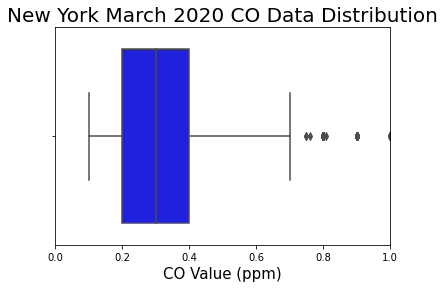

(0.0, 1.0)

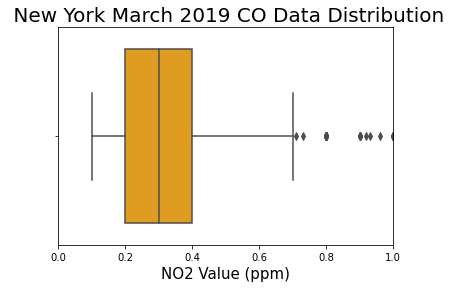

In [23]:
# Display Box Plot with distribution of data for the month of March (Top: 2020; Bottom: 2019)
# Box Plot indicates that CO value distribution is similar for March 2020 compared with March 2019
# This indicates that there may be less of a change in CO values in the New York Metropolitan area 
# compared to the change in CO values in the Los Angeles Metropolitan Area

sns.boxplot(NYMarTotalCO2020, color='b')
plt.title("New York March 2020 CO Data Distribution", fontsize=20)
plt.xlabel("CO Value (ppm)", fontsize=15)
plt.xlim(0,1)
plt.show()
sns.boxplot(NYMarTotalCO2019, color='orange')
plt.title(" New York March 2019 CO Data Distribution", fontsize=20)
plt.xlabel("NO2 Value (ppm)", fontsize=15)
plt.xlim(0,1)